In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn
from sklearn import metrics
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_curve

In [2]:
df = pd.read_csv("D:\\Nithin\\LB\\FRSH\\Project\\Car insurance pred\\Insurance_Data (1).csv")
rown,coln = df.shape
print(f'There are {rown} rows and {coln}columns')

There are 58592 rows and 44columns


In [3]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [6]:
col_explanations = [
    "The unique identifier for each insurance policy.",    "The length of time (in years) that the policy has been active.",    "The age of the insured car (in years) at the time the policy was taken.",
    "The age of the policyholder (in years) at the time the policy was taken.",    "A categorical variable representing the cluster or category to which the area of residence belongs.",    "A measure of the population density of the area where the policyholder resides.",    "The make or manufacturer of the insured car.",    "The segment or category to which the insured car belongs (e.g., compact, sedan, SUV).",    "The specific model or variant of the insured car.",    "The type of fuel used by the insured car (e.g., petrol, diesel, electric).",    "The maximum torque output of the car's engine.",
    "The maximum power output of the car's engine.",    "The type of engine used in the insured car (e.g., inline, V-type).", "The number of airbags installed in the car.",    "A binary variable indicating whether the car has an electronic stability control (ESC) system.",    "A binary variable indicating whether the car has adjustable steering.",
    "A binary variable indicating whether the car has a tire pressure monitoring system (TPMS).",    "A binary variable indicating whether the car has parking sensors.",    "A binary variable indicating whether the car has a parking camera.",    "The type of rear brakes used in the car.",    "The engine displacement of the car (typically measured in liters or cubic centimeters).",    "The number of cylinders in the car's engine.",
    "The type of transmission used in the car (e.g., manual, automatic).",    "The number of gears in the car's gearbox.",    "The type of steering system used in the car.",    "The minimum radius of the circular path that the car can make.",    "The length of the car.",    "The width of the car.",    "The height of the car.",
    "The gross weight or total weight of the car.",    "A binary variable indicating whether the car has front fog lights.",
    "A binary variable indicating whether the car has a rear window wiper.",    "A binary variable indicating whether the car has a rear window washer.",    "A binary variable indicating whether the car has a rear window defogger.",    "A binary variable indicating whether the car has a brake assist system.",    "A binary variable indicating whether the car has power door locks.",    "A binary variable indicating whether the car has central locking.",
    "A binary variable indicating whether the car has power steering.",    "A binary variable indicating whether the driver's seat height is adjustable.",    "A binary variable indicating whether the car has a day/night rearview mirror.",    "A binary variable indicating whether the car has an electronic crash warning (ECW) system.",    "A binary variable indicating whether the car has a speed alert system.",    "The safety rating of the car according to the New Car Assessment Program (NCAP).",    "A binary variable indicating whether an insurance claim has been filed for the car policy.",
]

col_explanations_df = pd.DataFrame({
    'Variables': df.columns,
    'Explanation': col_explanations
})
col_explanations_df

,Variables,Explanation
0,policy_id,The unique identifier for each insurance policy.
1,policy_tenure,The length of time (in years) that the policy ...
2,age_of_car,The age of the insured car (in years) at the t...
3,age_of_policyholder,The age of the policyholder (in years) at the ...
4,area_cluster,A categorical variable representing the cluste...
5,population_density,A measure of the population density of the are...
6,make,The make or manufacturer of the insured car.
7,segment,The segment or category to which the insured c...
8,model,The specific model or variant of the insured car.
9,fuel_type,The type of fuel used by the insured car (e.g....


In [7]:
df_copy = df.copy()
df.drop("policy_id",axis=1,inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


# DATA PREPROCESSING

## Handling Missing Values

In [8]:
print("NULL VALUE COUNTS :\n")
print(df.isnull().sum())

NULL VALUE COUNTS :

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                       

## Checking for Duplicates

In [9]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
df = df.drop_duplicates(keep='first')


Number of duplicate rows: 0


## Encoding the Data

In [10]:
df = df.replace({ "No" : False , "Yes" : True })
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [11]:
df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
df.drop(['max_torque','max_power'],axis =1,inplace=True )
df.columns


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm',
       'max_torque_rpm', 'max_power_bhp', 'max_power_rpm'],
      dtype='object')

In [12]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

<Axes: >

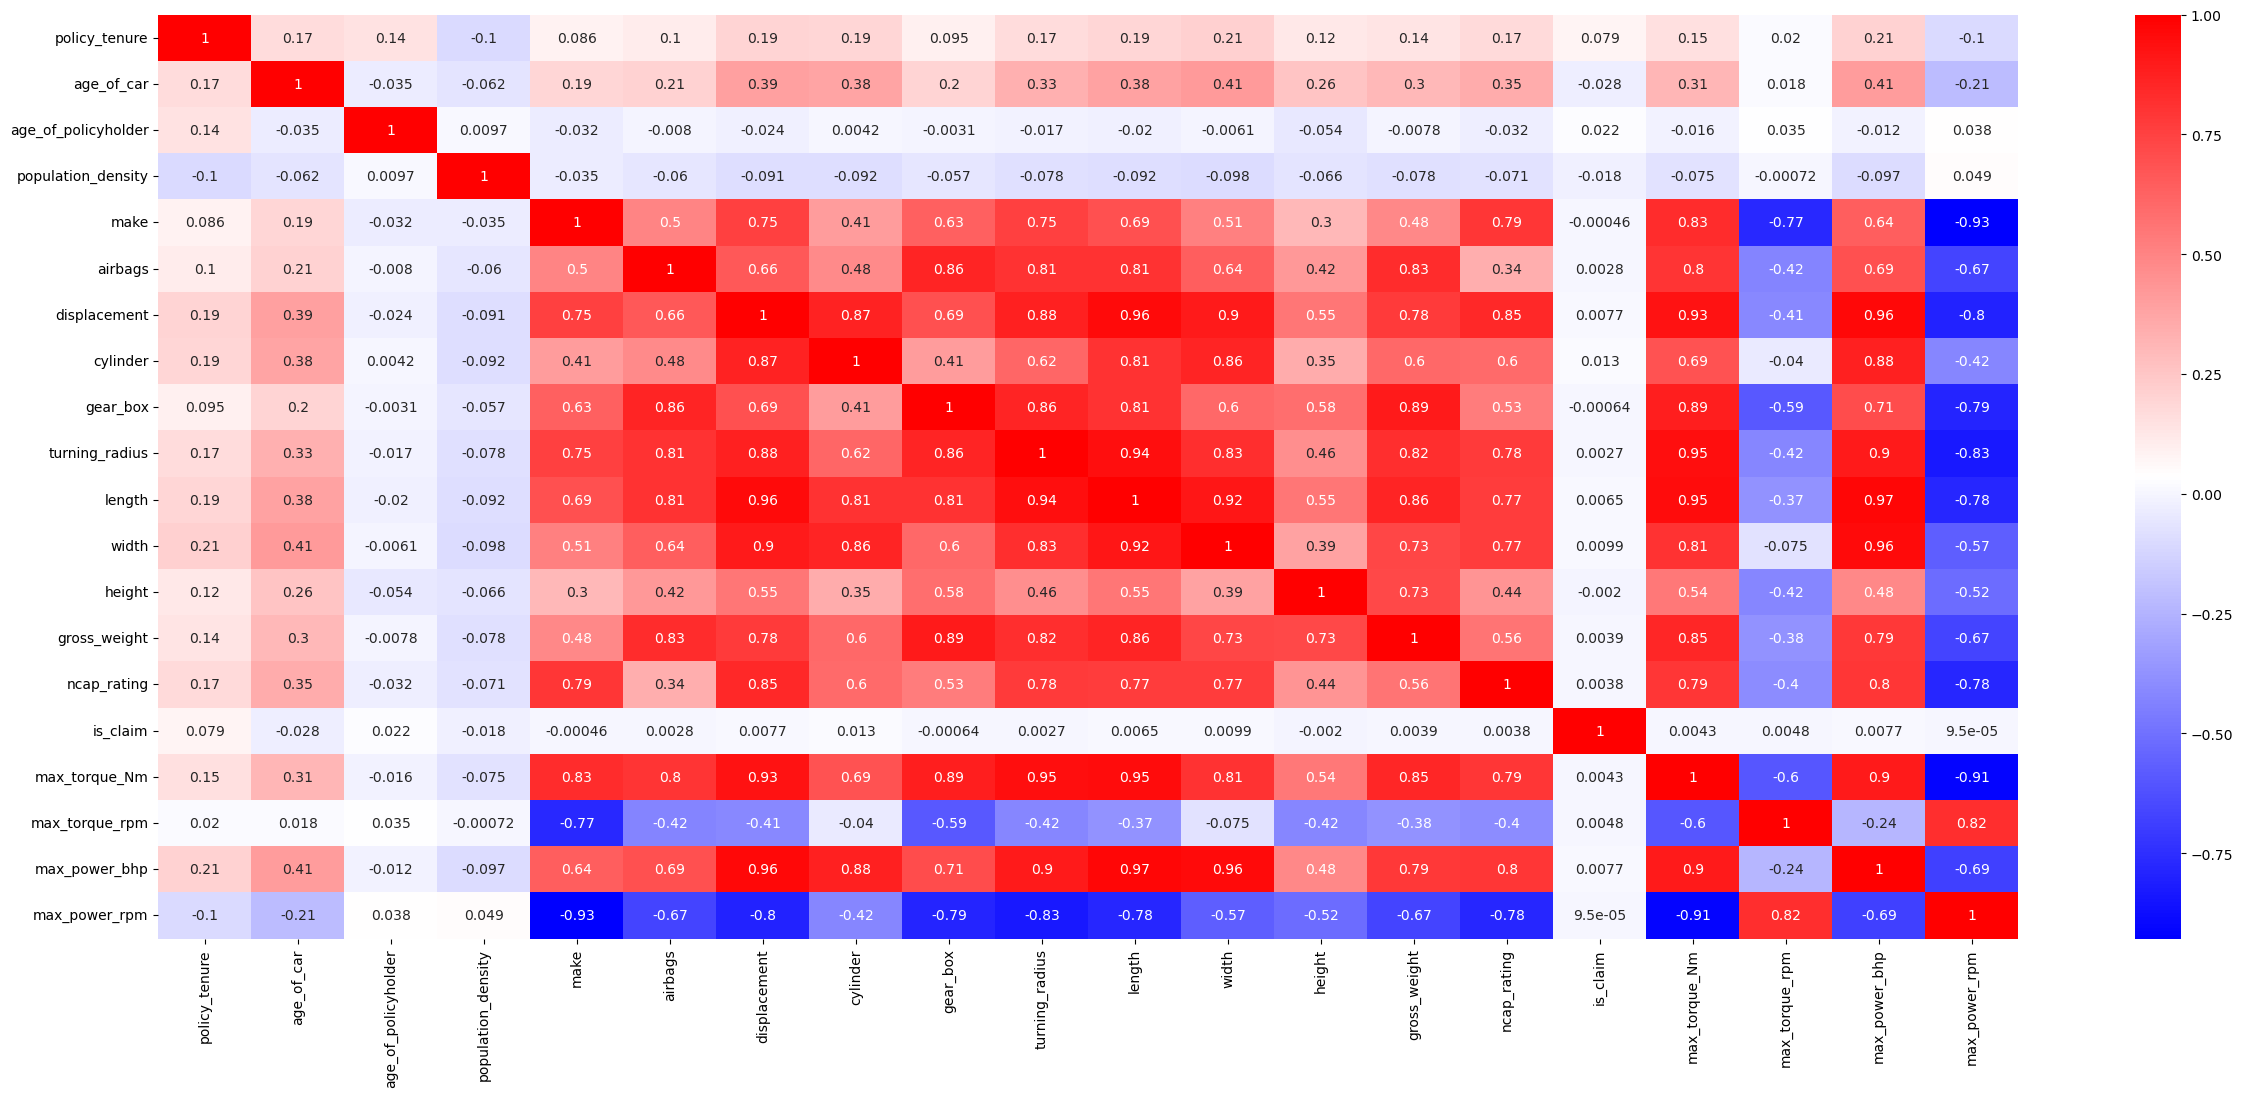

In [13]:
plt.figure(figsize=(30,12))
warnings.filterwarnings("ignore", category=FutureWarning)
sb.heatmap(corr_matrix,annot=True,cmap = "bwr")

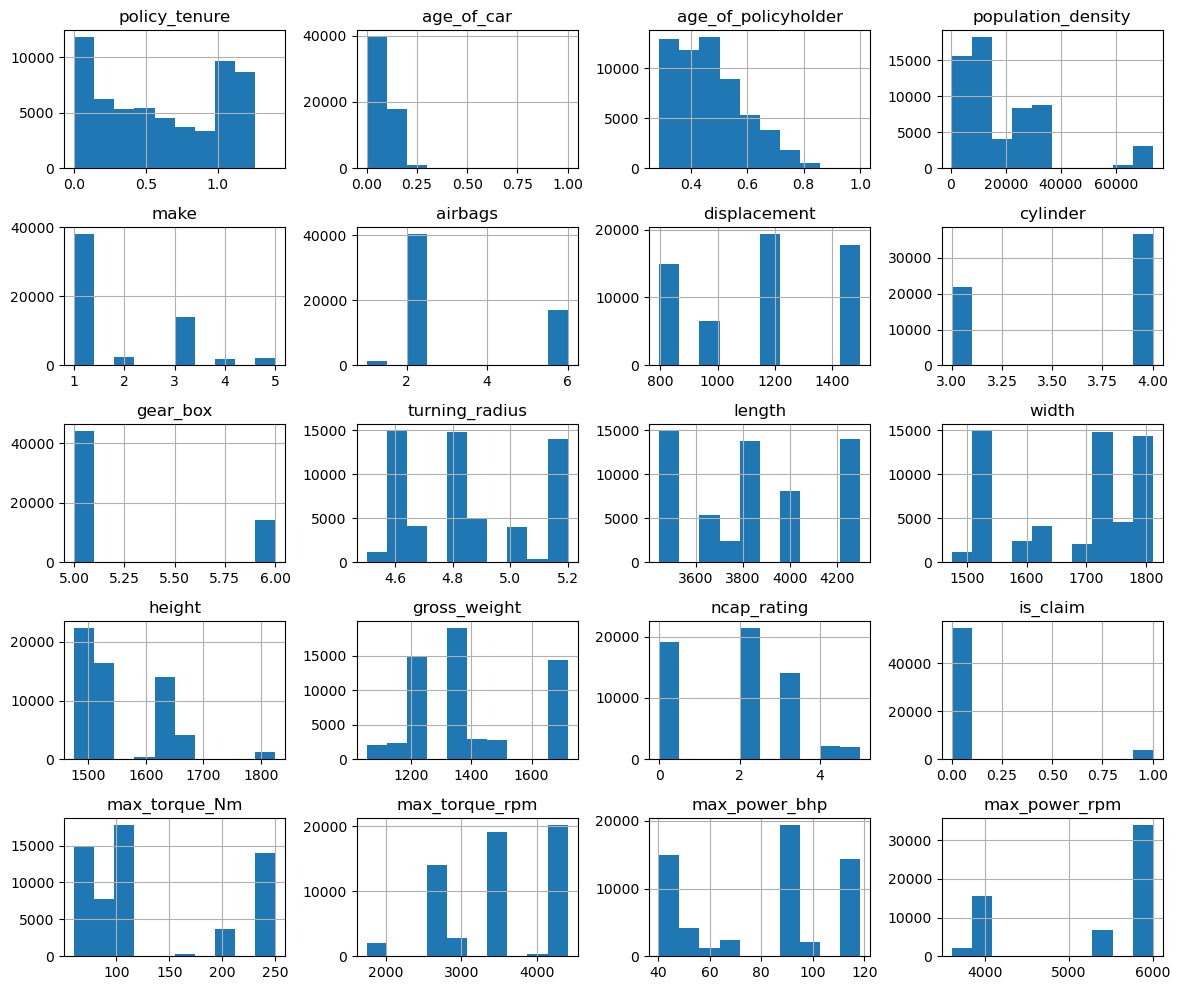

In [14]:
df.hist(figsize=(12, 10))
plt.tight_layout() 
plt.show()


In [15]:
categorical_columns = ['area_cluster', 'make', 'segment', 'model', 'fuel_type', 'engine_type', 'airbags',
                        'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
                        'rear_brakes_type', 'transmission_type', 'gear_box', 'steering_type',
                        'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
                        'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
                        'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable',
                        'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']
numerical_columns = [col for col in df.columns if col not in categorical_columns]
numerical_columns.remove('is_claim')
numerical_columns

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'displacement',
 'cylinder',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'max_torque_Nm',
 'max_torque_rpm',
 'max_power_bhp',
 'max_power_rpm']

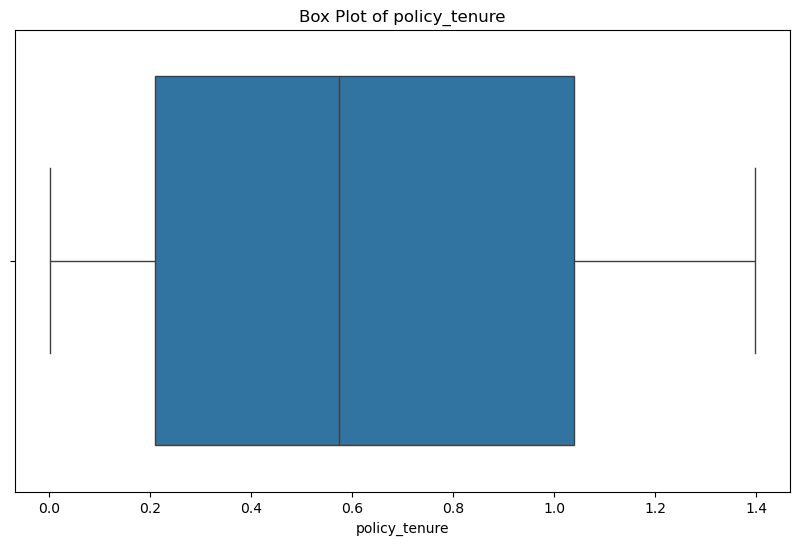

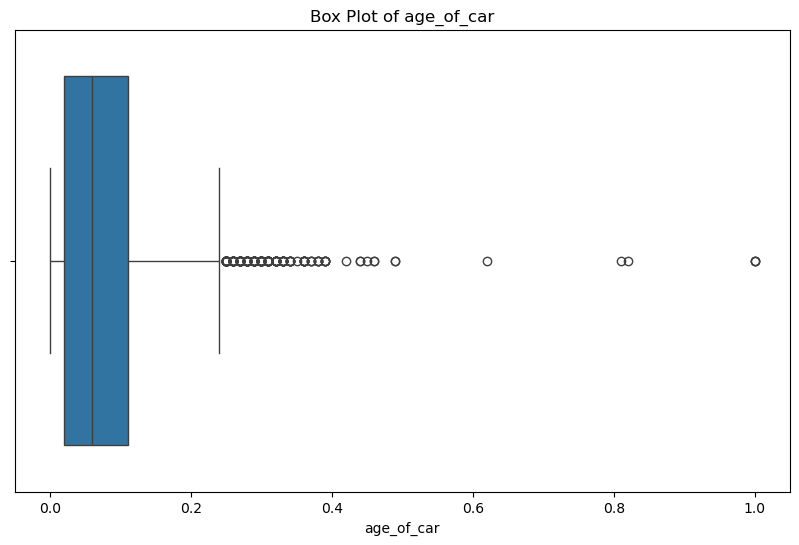

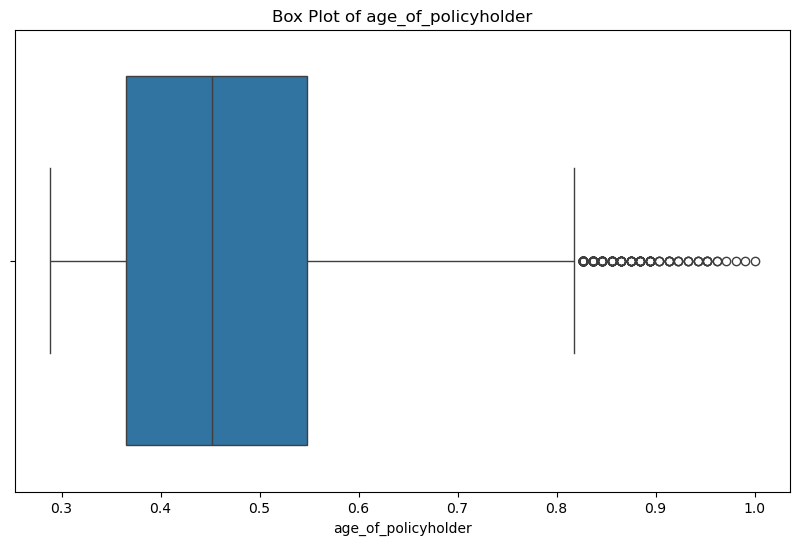

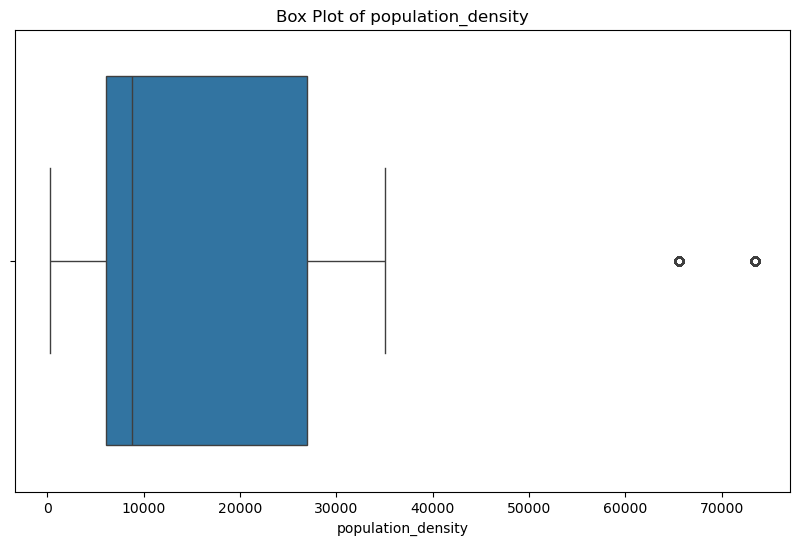

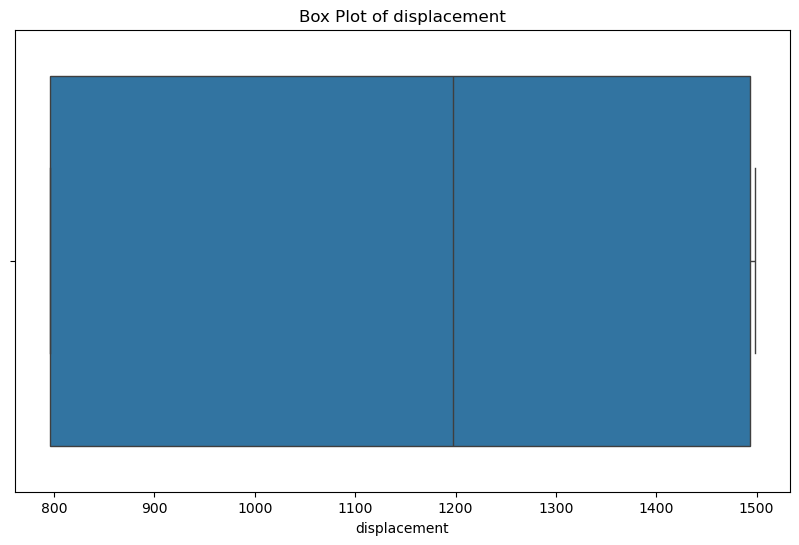

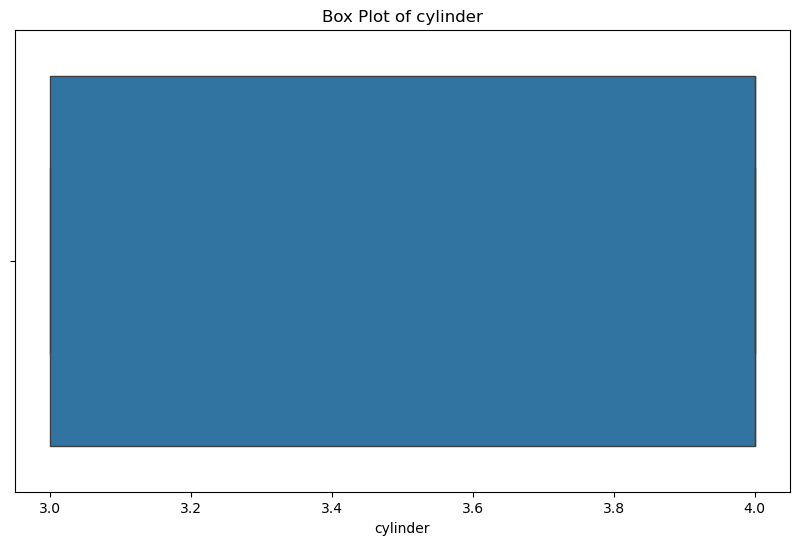

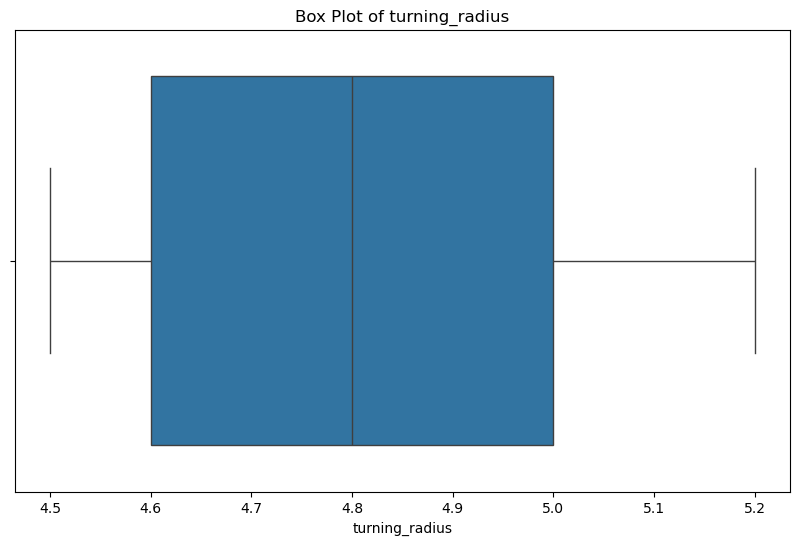

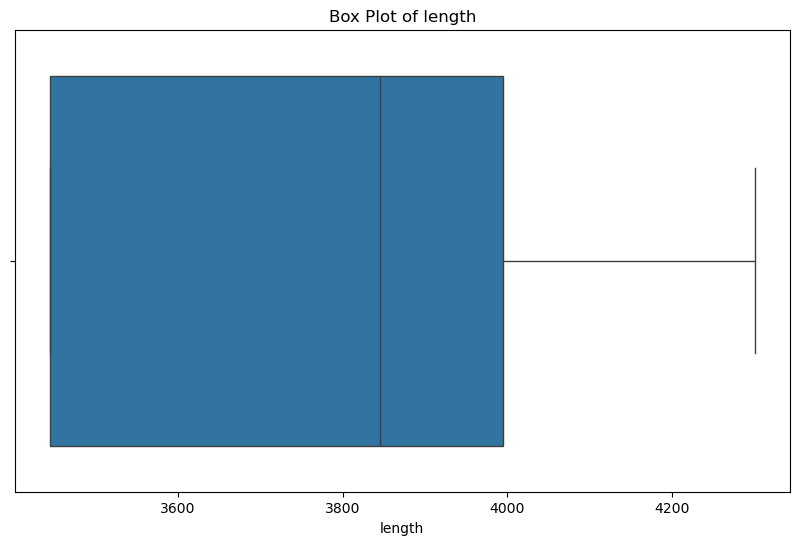

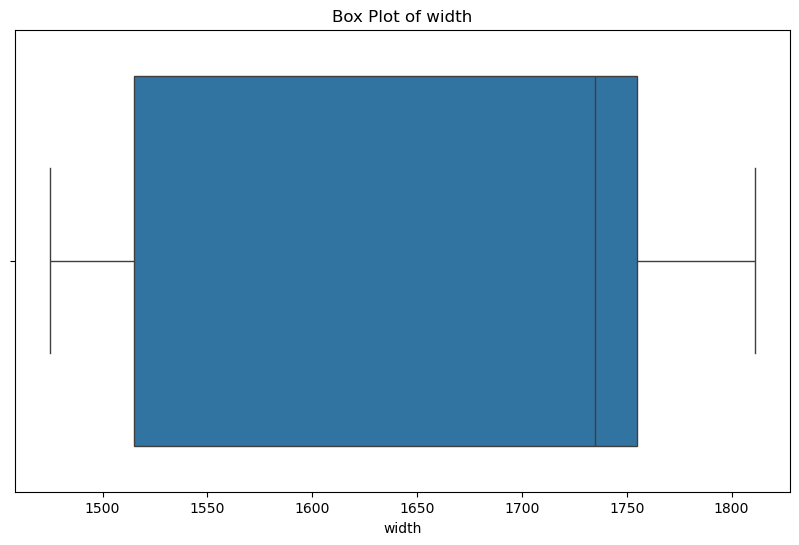

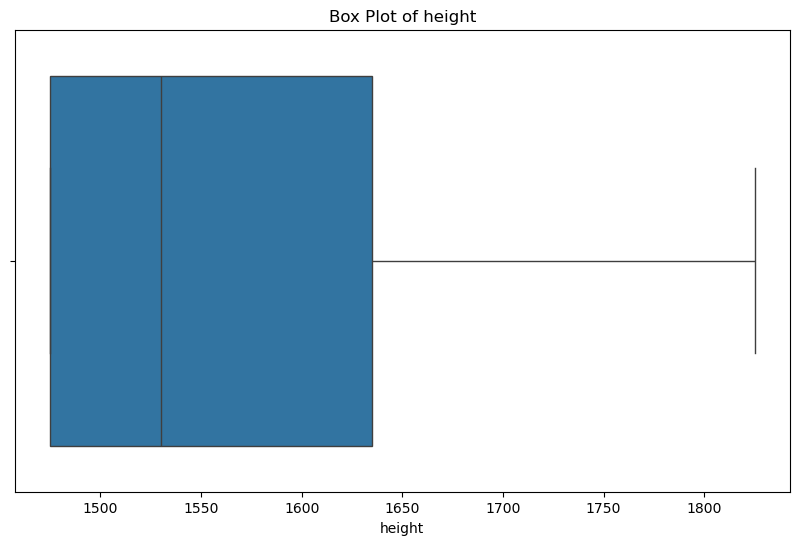

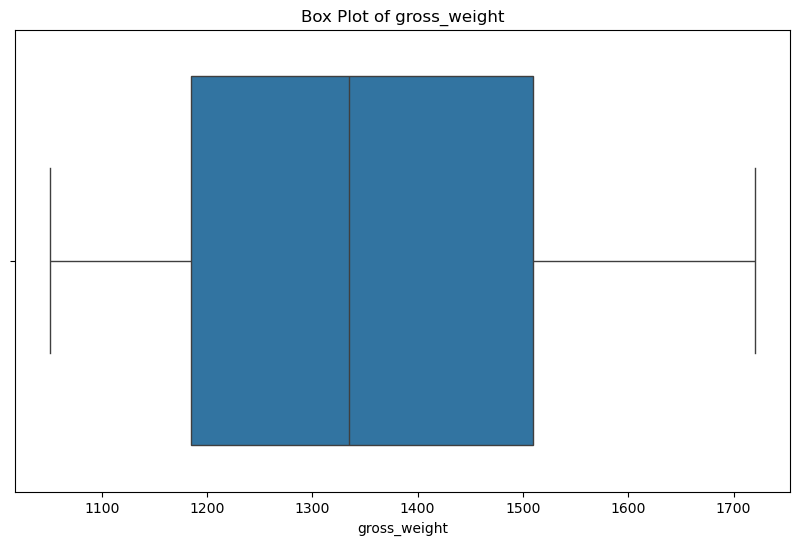

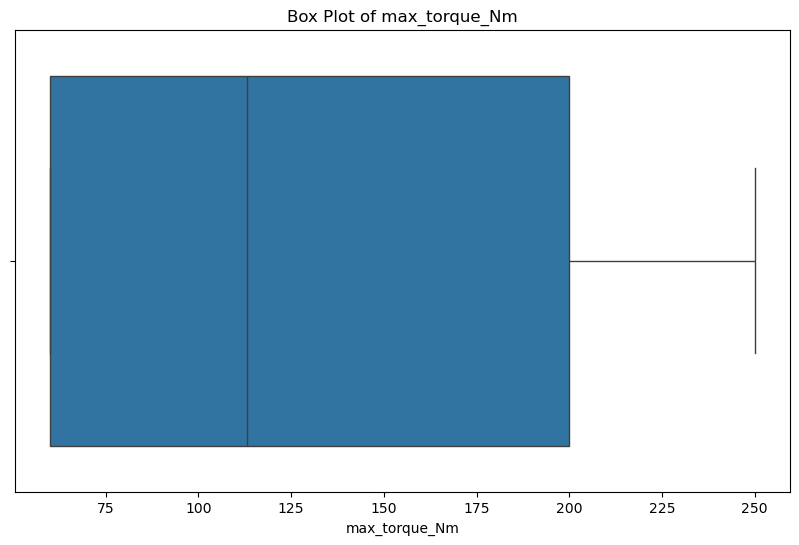

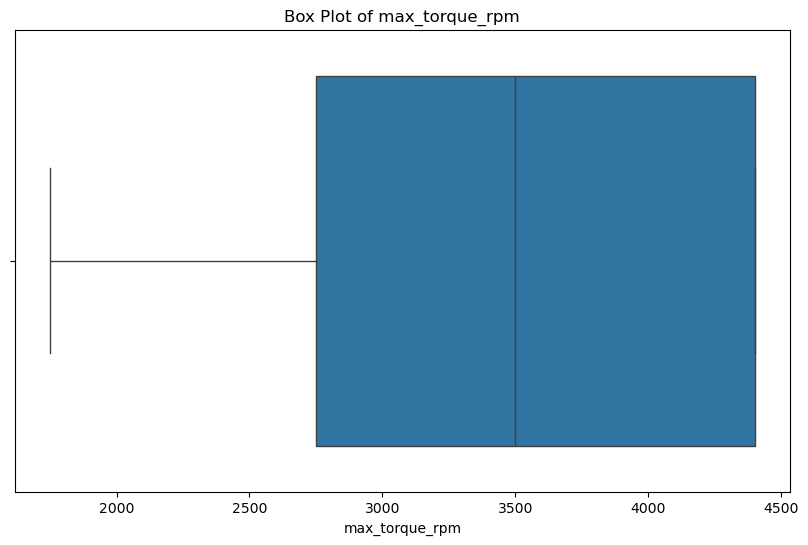

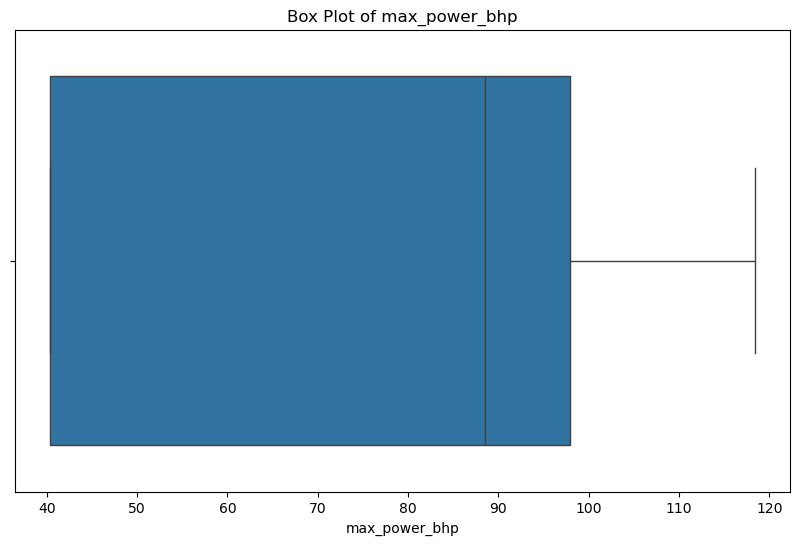

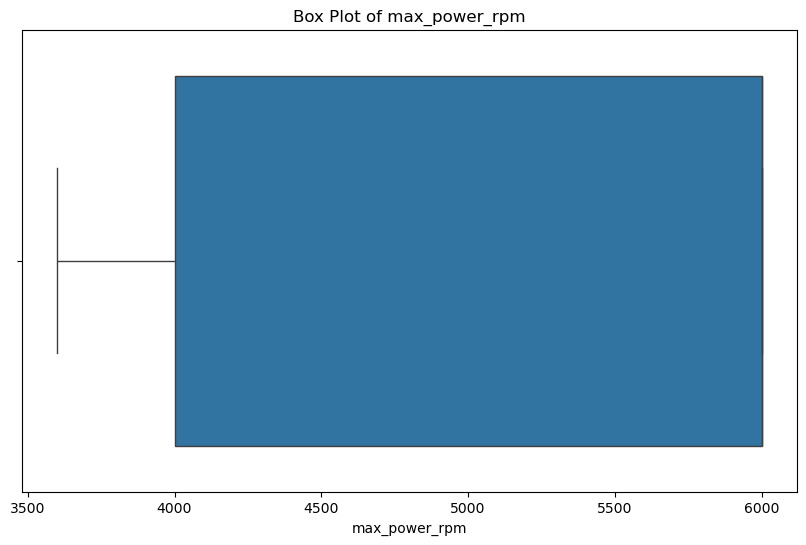

In [16]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sb.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [17]:
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    outliers_count = len(df) - len(df_filtered)
    return df_filtered, outliers_count

df, outliers_age_of_car = remove_outliers_iqr(df, 'age_of_car')
df, outliers_age_of_policyholder = remove_outliers_iqr(df, 'age_of_policyholder')

print("Outliers removed from 'age_of_car':", outliers_age_of_car)
print("Outliers removed from 'age_of_policyholder':", outliers_age_of_policyholder)



Outliers removed from 'age_of_car': 269
Outliers removed from 'age_of_policyholder': 219


In [18]:
le = LabelEncoder()

In [19]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm',
       'max_torque_rpm', 'max_power_bhp', 'max_power_rpm'],
      dtype='object')

In [20]:
ord_cat = ['ncap_rating']
for col in ord_cat:
    df[col + '_encoded'] = le.fit_transform(df[col])
df = pd.get_dummies(df, columns=[col for col in categorical_columns if col not in ord_cat])
df.head()


,policy_tenure,age_of_car,age_of_policyholder,population_density,displacement,cylinder,turning_radius,length,width,height,...,is_power_steering_False,is_power_steering_True,is_driver_seat_height_adjustable_False,is_driver_seat_height_adjustable_True,is_day_night_rear_view_mirror_False,is_day_night_rear_view_mirror_True,is_ecw_False,is_ecw_True,is_speed_alert_False,is_speed_alert_True
0,0.515874,0.05,0.644231,4990,796,3,4.6,3445,1515,1475,...,False,True,True,False,True,False,True,False,False,True
1,0.672619,0.02,0.375000,27003,796,3,4.6,3445,1515,1475,...,False,True,True,False,True,False,True,False,False,True
2,0.841110,0.02,0.384615,4076,796,3,4.6,3445,1515,1475,...,False,True,True,False,True,False,True,False,False,True
3,0.900277,0.11,0.432692,21622,1197,4,4.8,3995,1735,1515,...,False,True,False,True,False,True,False,True,False,True
4,0.596403,0.11,0.634615,34738,999,3,5.0,3731,1579,1490,...,False,True,True,False,False,True,False,True,False,True


In [21]:
X=df.drop("is_claim",axis=1)   
y=df["is_claim"] 

## Balancing the Target variable 

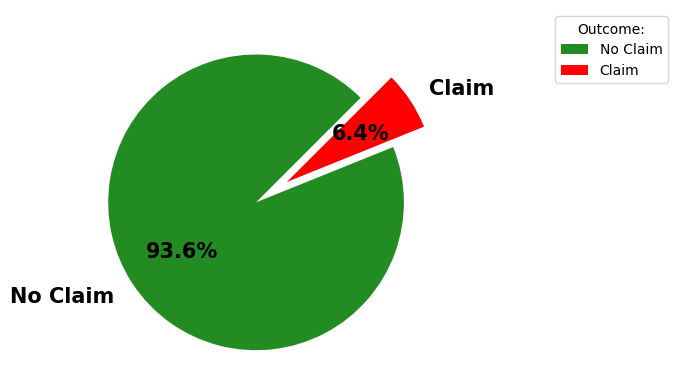

In [22]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(1, 1, 1, facecolor='white')
plt.pie(df_copy['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['forestgreen','red'],
        autopct='%1.1f%%',explode=[0.1, 0.15],labeldistance=1.15, startangle=45,
        textprops={'fontsize': 15, 'fontweight': 'bold'})
plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6, 1))
fig.patch.set_facecolor('white')
plt.show()

In [23]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE(random_state=12, sampling_strategy=0.8)
X_sm, y_sm =  sm.fit_resample(X,y)
X_sm.shape, y_sm.shape
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_sm)))

Original dataset shape Counter({0: 54394, 1: 3710})
Resampled dataset shape Counter({0: 54394, 1: 43515})


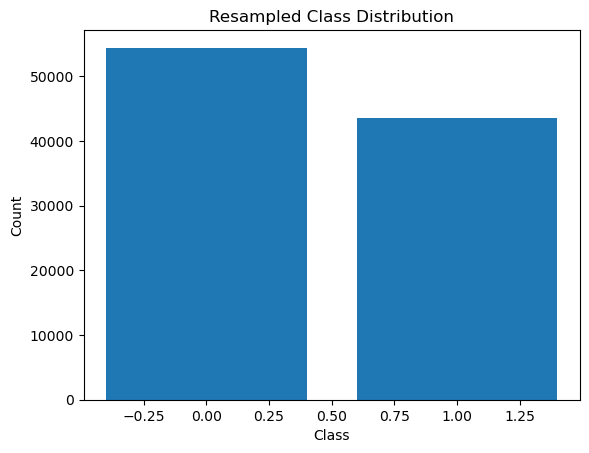

In [24]:
resampled_counts = Counter(y_sm)
plt.bar(resampled_counts.keys(), resampled_counts.values())
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Splitting the dataset

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train_val, X_val, y_train_val, y_val = train_test_split(X, y, 
                                             test_size=0.1, 
                                             random_state=42)


(73431, 121)
(24478, 121)
(73431,)
(24478,)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [27]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Fitting the Model

In [28]:
models = [XGBClassifier(),AdaBoostClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(),GaussianNB()]
model_names = ['XGBClassifier()','AdaBoostClassifier()' ,'DecisionTreeClassifier()', 'RandomForestClassifier()','KNeighborsClassifier()','GaussianNB']

In [29]:
from tqdm import tqdm
from sklearn import metrics
for i, model in tqdm(enumerate(models)):
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    val_accuracy = metrics.accuracy_score(y_val, y_val_pred)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    
    auc_roc_train = metrics.roc_auc_score(y_train, y_train_pred)
    f1_train = metrics.f1_score(y_train, y_train_pred)
      
    
    print(f'{model_names[i]}:')
    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'AUC-ROC : {auc_roc_train:.4f}')
    print(f'F1 Score : {f1_train:.4f}')
    print()


1it [00:10, 10.83s/it]

XGBClassifier():
Training Accuracy: 0.9574
Test Accuracy: 0.9548
Validation Accuracy: 0.9386
AUC-ROC : 0.9521
F1 Score : 0.9496



2it [00:20, 10.21s/it]

AdaBoostClassifier():
Training Accuracy: 0.7056
Test Accuracy: 0.7007
Validation Accuracy: 0.7305
AUC-ROC : 0.6994
F1 Score : 0.6602



3it [00:22,  6.50s/it]

DecisionTreeClassifier():
Training Accuracy: 1.0000
Test Accuracy: 0.9113
Validation Accuracy: 0.9656
AUC-ROC : 1.0000
F1 Score : 1.0000



4it [00:56, 17.23s/it]

RandomForestClassifier():
Training Accuracy: 1.0000
Test Accuracy: 0.8947
Validation Accuracy: 0.9713
AUC-ROC : 1.0000
F1 Score : 1.0000



5it [01:31, 23.75s/it]

KNeighborsClassifier():
Training Accuracy: 0.8585
Test Accuracy: 0.7857
Validation Accuracy: 0.7878
AUC-ROC : 0.8654
F1 Score : 0.8531



6it [01:32, 15.37s/it]

GaussianNB:
Training Accuracy: 0.5166
Test Accuracy: 0.5150
Validation Accuracy: 0.3733
AUC-ROC : 0.5369
F1 Score : 0.5679



6it [01:09, 11.63s/it]


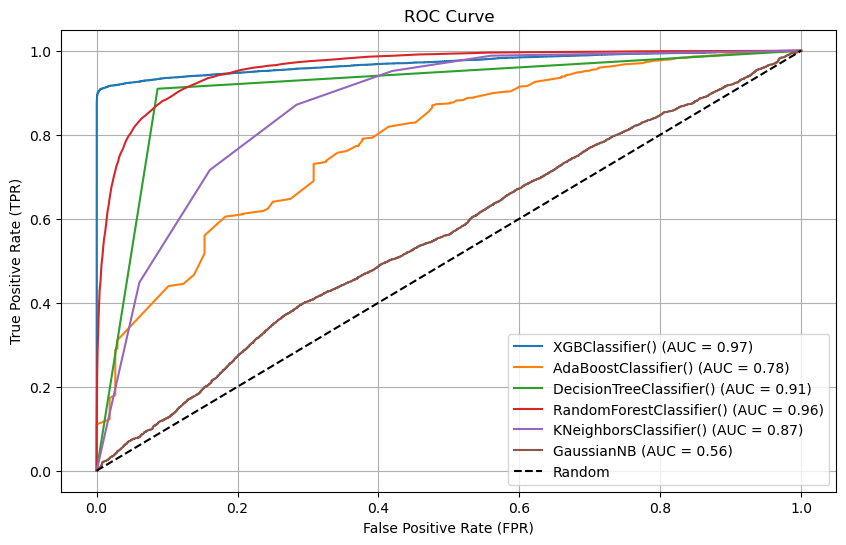

In [30]:
plt.figure(figsize=(10, 6))

for i, model in tqdm(enumerate(models)):
    model.fit(X_train_scaled, y_train)
    
    y_train_pred_prob = model.predict_proba(X_train_scaled)[:, 1]
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    plt.plot(fpr_test, tpr_test, label=f'{model_names[i]} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Hyperparameter Tuning

In [31]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
#Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_



Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   3.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   3.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; tot

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.0

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.0

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   2.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.0

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   2.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.0

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   2.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_d

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.0

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=300, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_d

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_d

In [32]:
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
auc_roc_test = metrics.roc_auc_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'AUC-ROC : {auc_roc_test:.4f}')
print(f'F1 Score : {f1_test:.4f}')

Training Accuracy: 0.9597
Test Accuracy: 0.9576
AUC-ROC : 0.9528
F1 Score : 0.9504


## Confusion Matrix

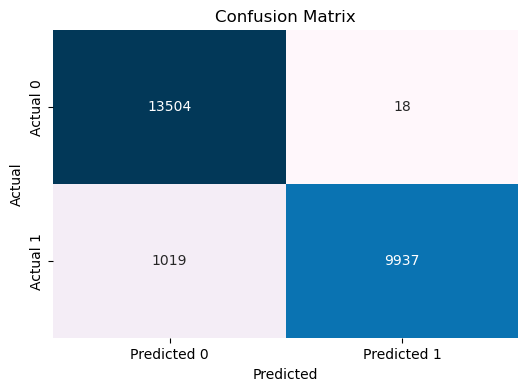

In [33]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sb.heatmap(cm, annot=True, fmt='d', cmap='PuBu', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion 
### The Xgb classifier is the best suited for the problem statement 